In [1]:
import numpy as np
import pickle
import json
import random
import pyttsx3
from colorama import init, Fore
import tflearn
import tensorflow as tf
import random
import json
import pickle
import nltk
from nltk.stem.lancaster import LancasterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


Load Dataset

In [2]:
with open('intents.json') as file:
    data = json.load(file)
    print(data)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hello', 'Hay'], 'responses': ['Hello', 'Hi', 'Hi there'], 'context': ['']}, {'tag': 'goodbye', 'patterns': ['Bye', 'See you later', 'Goodbye'], 'responses': ['See you later', 'Have a nice day', 'Bye! Come back again'], 'context': ['']}, {'tag': 'thanks', 'patterns': ['Thanks', 'Thank you', "That's helpful", 'Thanks for the help'], 'responses': ['Happy to help!', 'Any time!', 'My pleasure', "You're most welcome!"], 'context': ['']}, {'tag': 'about', 'patterns': ['Who are you?', 'What are you?', 'Who you are?'], 'responses': ["I'm a bot assistant", "I'm Joana, a master's university recommendation bot"], 'context': ['']}, {'tag': 'help', 'patterns': ['I need some help?', 'Can youn find me some masters university?'], 'responses': ['How can i assist you?', 'Sure.Please provide your academic scores.What is your tofel score?'], 'context': ['']}, {'tag': 'recommendation', 'patterns': ["Recommend me a master's unive

In [3]:
import pandas as pd

data = pd.DataFrame(data)
data.head()

,intents
0,"{'tag': 'greeting', 'patterns': ['Hi', 'Hey', ..."
1,"{'tag': 'goodbye', 'patterns': ['Bye', 'See yo..."
2,"{'tag': 'thanks', 'patterns': ['Thanks', 'Than..."
3,"{'tag': 'about', 'patterns': ['Who are you?', ..."
4,"{'tag': 'help', 'patterns': ['I need some help..."


EDA

In [4]:
data.columns

Index(['intents'], dtype='object')

In [5]:
# Convert the JSON data into a Pandas DataFrame
df = pd.DataFrame(data['intents'])
df = data['intents']
# Display the first few rows of the dataset
print(df.head())

# Get basic statistics of the dataset
print(df.describe())

# Perform data analysis

# Count the number of conversations
num_conversations = len(df)
print("Number of conversations:", num_conversations)


0    {'tag': 'greeting', 'patterns': ['Hi', 'Hey', ...
1    {'tag': 'goodbye', 'patterns': ['Bye', 'See yo...
2    {'tag': 'thanks', 'patterns': ['Thanks', 'Than...
3    {'tag': 'about', 'patterns': ['Who are you?', ...
4    {'tag': 'help', 'patterns': ['I need some help...
Name: intents, dtype: object
count                                                    15
unique                                                   15
top       {'tag': 'no_toefl', 'patterns': ['I haven't ta...
freq                                                      1
Name: intents, dtype: object
Number of conversations: 15


In [6]:
# Iterate through intents
for intent in data["intents"]:
    tag = intent["tag"]
    patterns = intent["patterns"]
    responses = intent["responses"]
    
    # Compute pattern message lengths
    pattern_lengths = [len(pattern) for pattern in patterns]
    responses_lengths = [len(responses) for responses in responses]
    
    print(f"Tag: {tag}")
    print("Pattern Message Lengths:", pattern_lengths)
    print("responses Message Lengths:", responses_lengths)
    print()

Tag: greeting
Pattern Message Lengths: [2, 3, 16, 5, 3]
responses Message Lengths: [5, 2, 8]

Tag: goodbye
Pattern Message Lengths: [3, 13, 7]
responses Message Lengths: [13, 15, 20]

Tag: thanks
Pattern Message Lengths: [6, 9, 14, 19]
responses Message Lengths: [14, 9, 11, 20]

Tag: about
Pattern Message Lengths: [12, 13, 12]
responses Message Lengths: [19, 51]

Tag: help
Pattern Message Lengths: [17, 41]
responses Message Lengths: [21, 66]

Tag: recommendation
Pattern Message Lengths: [34, 28, 39]
responses Message Lengths: [53, 83]

Tag: field
Pattern Message Lengths: [37, 24, 24, 21, 41]
responses Message Lengths: [38, 52, 33]

Tag: ielts_score
Pattern Message Lengths: [16, 20, 22, 18]
responses Message Lengths: [60]

Tag: toefl_score
Pattern Message Lengths: [21, 18, 21, 18, 18]
responses Message Lengths: [43]

Tag: gre_score
Pattern Message Lengths: [19, 16, 20, 16, 23]
responses Message Lengths: [40]

Tag: no_gre
Pattern Message Lengths: [23, 12, 19]
responses Message Lengths: [

In [7]:
df.head()

0    {'tag': 'greeting', 'patterns': ['Hi', 'Hey', ...
1    {'tag': 'goodbye', 'patterns': ['Bye', 'See yo...
2    {'tag': 'thanks', 'patterns': ['Thanks', 'Than...
3    {'tag': 'about', 'patterns': ['Who are you?', ...
4    {'tag': 'help', 'patterns': ['I need some help...
Name: intents, dtype: object

In [8]:
intents = data["intents"]

# Create empty lists to store the data
tags = []
patterns = []
responses = []
contexts = []

# Iterate over the intents and extract the data
for intent in intents:
    tag = intent["tag"]
    pattern_list = intent["patterns"]
    response_list = intent["responses"]
    context_list = intent["context"]
    max_length = max(len(pattern_list), len(response_list), len(context_list))
    
    # Pad the shorter lists with None to match the length of the longest list
    pattern_list += [None] * (max_length - len(pattern_list))
    response_list += [None] * (max_length - len(response_list))
    context_list += [None] * (max_length - len(context_list))
    
    # Append the data to the respective lists
    tags.extend([tag] * max_length)
    patterns.extend(pattern_list)
    responses.extend(response_list)
    contexts.extend(context_list)

# Create a dictionary from the extracted data
df = {
    "tag": tags,
    "patterns": patterns,
    "responses": responses,
    "context": contexts
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(df)

In [9]:
df

,tag,patterns,responses,context
0,greeting,Hi,Hello,
1,greeting,Hey,Hi,None
2,greeting,Is anyone there?,Hi there,None
3,greeting,Hello,None,None
4,greeting,Hay,None,None
...,...,...,...,...
57,cgpa,CGPA is 3.10,None,None
58,cgpa,CGPA is 3.28,None,None
59,recommendation_flow,My preferred location is USA and my field of s...,Based on your preferences of usa and academic ...,
60,recommendation_flow,I want to study in united states in cse,None,None


In [10]:
df.columns

Index(['tag', 'patterns', 'responses', 'context'], dtype='object')

In [11]:

num_unique_patterns = df["patterns"].nunique()
num_unique_responses = df["responses"].nunique()
print("Number of unique patterns:", num_unique_patterns)
print("Number of unique responses:", num_unique_responses)

Number of unique patterns: 62
Number of unique responses: 28


In [12]:
df['message_length'] = df['patterns'].apply(len)

In [13]:
df

,tag,patterns,responses,context,message_length
0,greeting,Hi,Hello,,2
1,greeting,Hey,Hi,None,3
2,greeting,Is anyone there?,Hi there,None,16
3,greeting,Hello,None,None,5
4,greeting,Hay,None,None,3
...,...,...,...,...,...
57,cgpa,CGPA is 3.10,None,None,12
58,cgpa,CGPA is 3.28,None,None,12
59,recommendation_flow,My preferred location is USA and my field of s...,Based on your preferences of usa and academic ...,,70
60,recommendation_flow,I want to study in united states in cse,None,None,39


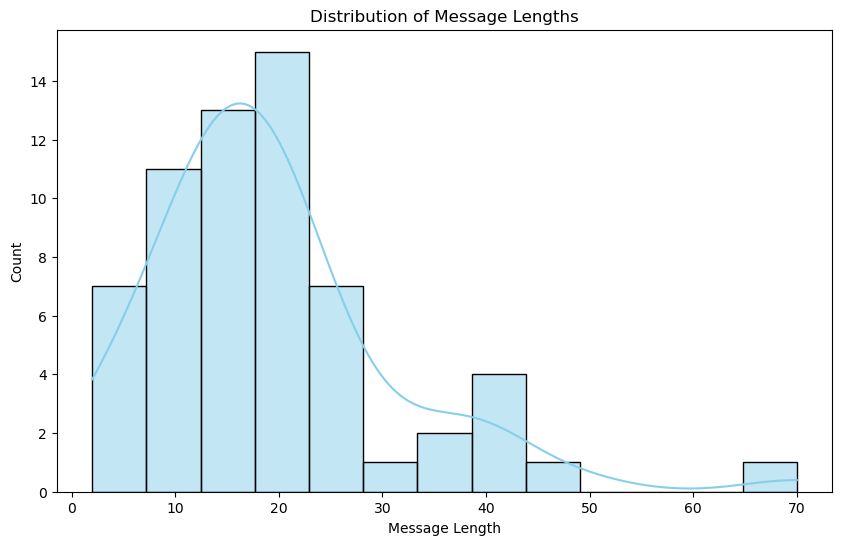

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', kde=True,color = 'skyblue')

plt.xlabel("Message Length")
plt.ylabel('Count')
plt.title('Distribution of Message Lengths')
plt.show()

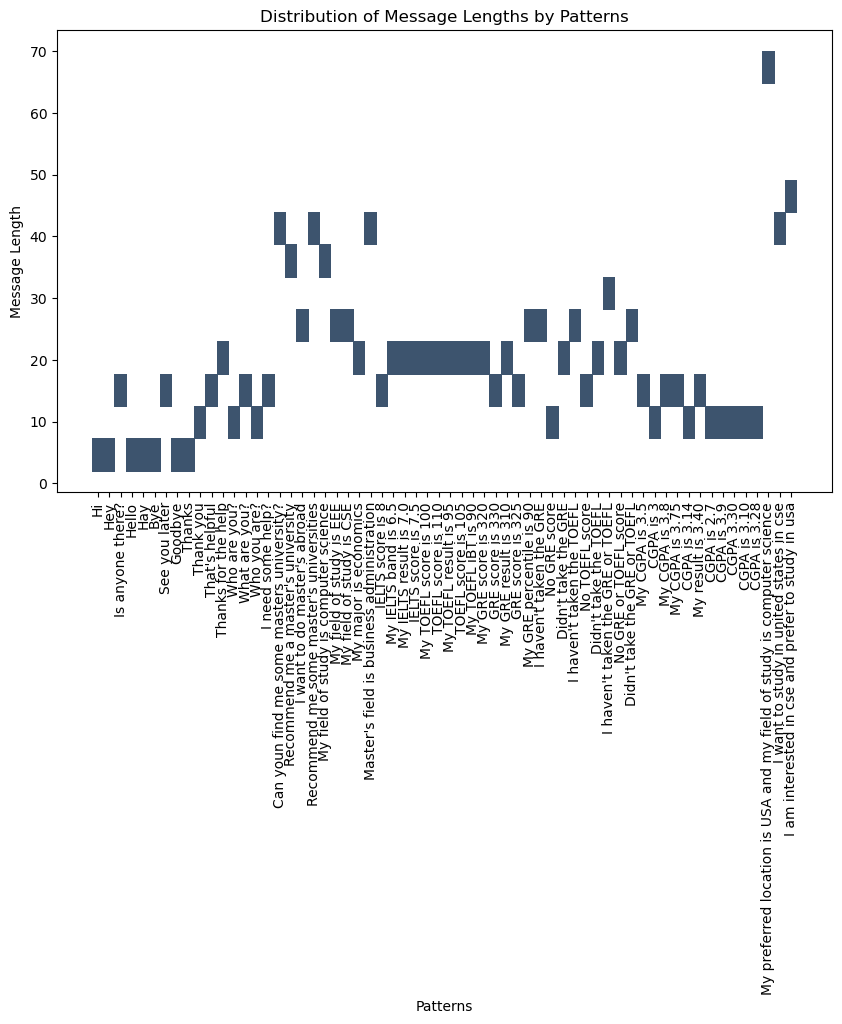

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='patterns', y='message_length')
plt.xlabel('Patterns')
plt.ylabel('Message Length')
plt.title('Distribution of Message Lengths by Patterns')
plt.xticks(rotation=90)
plt.show()

In [16]:
from collections import Counter

# Concatenate all user messages
user_messages = ' '.join(df['patterns'])

# Tokenize the text and count the frequencies
user_word_counts = Counter(user_messages.split())

# Print the most common words
print("Most common words used by users:")
print(user_word_counts.most_common(10))


Most common words used by users:
[('is', 31), ('My', 17), ('score', 11), ('TOEFL', 11), ('GRE', 11), ('CGPA', 10), ('the', 7), ('I', 7), ('study', 6), ('field', 5)]


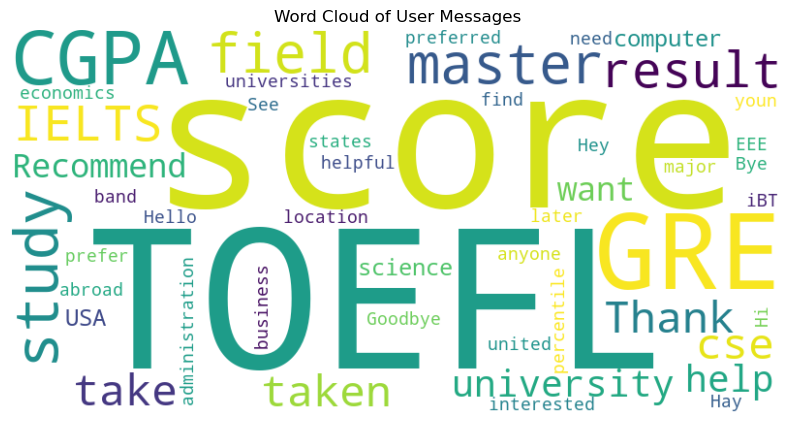

In [18]:
from wordcloud import WordCloud
# Concatenate all user messages
user_messages = ' '.join(df['patterns'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(user_messages)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of User Messages')
plt.show()

Converting Again

In [19]:
df = pd.DataFrame(data)

In [20]:
df.head()

,intents
0,"{'tag': 'greeting', 'patterns': ['Hi', 'Hey', ..."
1,"{'tag': 'goodbye', 'patterns': ['Bye', 'See yo..."
2,"{'tag': 'thanks', 'patterns': ['Thanks', 'Than..."
3,"{'tag': 'about', 'patterns': ['Who are you?', ..."
4,"{'tag': 'help', 'patterns': ['I need some help..."


In [21]:
df.columns

Index(['intents'], dtype='object')

Cleaning Data

In [22]:
with open('saved_variables.pickle', 'rb') as file:
    stemmed_words, tags, ignore_words, X, y = pickle.load(file) 

In [23]:
stemmer = LancasterStemmer() #stemmer to get stem of a word. ex. 'say' would be stem word of 'saying'.


def define_network(X, y):
	tf.compat.v1.reset_default_graph() #Clears the default graph stack and resets the global default graph
	# neural network's layers
	network = tflearn.input_data(shape= [None, len(X[0])]) #input layer
	network = tflearn.fully_connected(network, 8) #1st hidden layer
	network = tflearn.fully_connected(network, 8) #2nd hidden layer
	network = tflearn.fully_connected(network, len(y[0]), activation= 'softmax') #output layer
	network = tflearn.regression(network)
	model = tflearn.DNN(network, tensorboard_dir='tflearn_logs') #tensorboard_dir is path to store logs
	return model


# gives stemmed, tokenized words list from sentence pattern without words in ignore_words list
def clean_pattern(pattern, ignore_words):
    stemmed_pattern = []
    wrds = nltk.word_tokenize(pattern)
    for w in wrds:
        if w not in ignore_words:
            stemmed_pattern.append(stemmer.stem(w.lower()))
    return stemmed_pattern


# generates a numpy array of 0 & 1 from string sentence of user to fed to model
def bag_of_words(sentence, stemmed_words, ignore_words):
	bag = []
	stemmed_pattern = clean_pattern(sentence, ignore_words)
	for w in stemmed_words:
		if w in stemmed_pattern:
			bag.append(1)
		else:
			bag.append(0)
	return np.array(bag)

Training

In [24]:
# Some cleaning of data in intents.json
stemmed_words = []
tags = []
ignore_words = ['!', '?']
corpus = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        stemmed_pattern = clean_pattern(pattern, ignore_words)
        stemmed_words.extend(stemmed_pattern)
        corpus.append((stemmed_pattern, intent['tag']))
    if intent['tag'] not in tags:
        tags.append(intent['tag'])

# remove duplicates and sort
stemmed_words = sorted(list(set(stemmed_words)))
tags = sorted(list(set(tags)))

print(stemmed_words)
print(tags)
print(corpus)

["'s", '100', '105', '110', '2.7', '3', '3.10', '3.14', '3.28', '3.30', '3.40', '3.5', '3.75', '3.8', '3.9', '310', '320', '325', '330', '6.5', '7.0', '7.5', '8', '90', '95', 'a', 'abroad', 'admin', 'am', 'and', 'anyon', 'ar', 'band', 'busy', 'bye', 'can', 'cgpa', 'comput', 'cse', 'did', 'do', 'econom', 'ee', 'field', 'find', 'for', 'goodby', 'gre', 'hav', 'hay', 'hello', 'help', 'hey', 'hi', 'i', 'ibt', 'ielt', 'in', 'interest', 'is', 'lat', 'loc', 'maj', 'mast', 'me', 'my', "n't", 'nee', 'no', 'of', 'or', 'percentil', 'pref', 'prefer', 'recommend', 'result', 'sci', 'scor', 'see', 'som', 'stat', 'study', 'tak', 'thank', 'that', 'the', 'ther', 'to', 'toefl', 'unit', 'univers', 'us', 'want', 'what', 'who', 'you', 'youn']
['about', 'cgpa', 'field', 'goodbye', 'gre_score', 'greeting', 'help', 'ielts_score', 'no_gre', 'no_gre_toefl', 'no_toefl', 'recommendation', 'recommendation_flow', 'thanks', 'toefl_score']
[(['hi'], 'greeting'), (['hey'], 'greeting'), (['is', 'anyon', 'ther'], 'greetin

In [25]:
# Creating numeric features and labels out of cleaned data
X = []
y = []
for item in corpus:
    bag = [] #array of 1 and 0. 1 if stemmed word is present in stemmed pattern
    stemmed_pattern = item[0]
    for w in stemmed_words:
        if w in stemmed_pattern:
            bag.append(1)
        else:
            bag.append(0)

    tags_row = [] #array of 1 and 0. 1 for current tag and for everything else 0.
    current_tag = item[1]
    for tag in tags:
        if tag == current_tag:
            tags_row.append(1)
        else:
            tags_row.append(0)

    #for each item in corpus, X will be array indicating stemmed words and y array indicating tags
    X.append(bag)
    y.append(tags_row) 

X = np.array(X)
y = np.array(y)
print(X)
print(y)

# saving variables in pickle to be used by main.py
with open('saved_variables.pickle', 'wb') as file:
    pickle.dump((stemmed_words, tags, ignore_words, X, y), file)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 

In [26]:
model = define_network(X, y)
model.fit(X, y, n_epoch=1120, batch_size=8, show_metric=True) 
model.save("chatbot_model.tflearn")

Training Step: 8959  | total loss: 0.64081 | time: 0.029s
| Adam | epoch: 1120 | loss: 0.64081 - acc: 0.9545 -- iter: 56/62
Training Step: 8960  | total loss: 0.58276 | time: 0.033s
| Adam | epoch: 1120 | loss: 0.58276 - acc: 0.9590 -- iter: 62/62
--


INFO:tensorflow:f:\NSU\cse498R\498.5\chatbot_model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


Another Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(X[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model 
hist = model.fit(np.array(X), np.array(y), epochs=50, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("model created")

Train on 62 samples
Epoch 1/50
62/62 [==============================] - 0s 3ms/sample - loss: 2.7144 - acc: 0.0645
Epoch 2/50
62/62 [==============================] - 0s 595us/sample - loss: 2.6214 - acc: 0.1452
Epoch 3/50
62/62 [==============================] - 0s 724us/sample - loss: 2.4528 - acc: 0.2581
Epoch 4/50
62/62 [==============================] - 0s 595us/sample - loss: 2.3985 - acc: 0.2903
Epoch 5/50
62/62 [==============================] - 0s 611us/sample - loss: 2.1500 - acc: 0.2419
Epoch 6/50
62/62 [==============================] - 0s 676us/sample - loss: 2.0632 - acc: 0.2742
Epoch 7/50
62/62 [==============================] - 0s 499us/sample - loss: 1.9887 - acc: 0.4355
Epoch 8/50
62/62 [==============================] - 0s 515us/sample - loss: 1.7893 - acc: 0.3871
Epoch 9/50
62/62 [==============================] - 0s 659us/sample - loss: 1.6321 - acc: 0.4677
Epoch 10/50
62/62 [==============================] - 0s 804us/sample - loss: 1.6006 - acc: 0.5161
Epoch 11/50

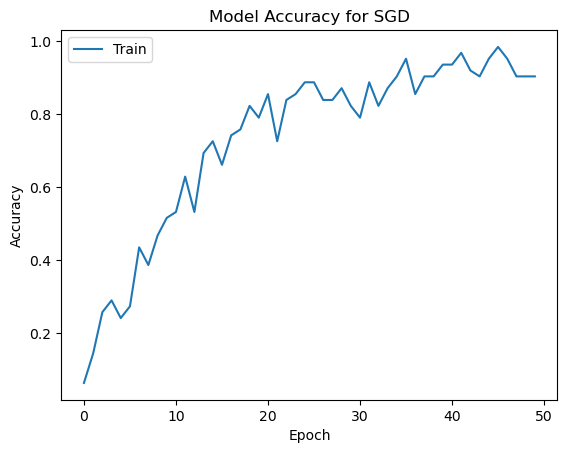

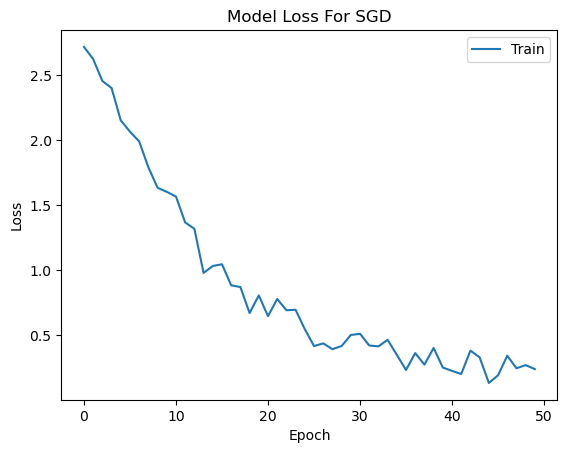

In [43]:
# Plot the training and validation accuracy
plt.plot(hist.history['acc'])
plt.title('Model Accuracy for SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(hist.history['loss'])
plt.title('Model Loss For SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Main

In [30]:
init(autoreset=True)
engine = pyttsx3.init()
model = define_network(X, y)
model.load("chatbot_model.tflearn")


INFO:tensorflow:Restoring parameters from f:\NSU\cse498R\498.5\chatbot_model.tflearn


In [31]:
# to handle previous context and give advantage to results of that context
def context_func(context, user_input):
	model_input = [bag_of_words(user_input, stemmed_words, ignore_words)]
	results = model.predict(model_input)[0]
	for intent in data['intents']:
		if 'context_filter' in intent:
			if intent['context_filter'] == context:
				# looping through tags and their indices
				for tg_index, tg in enumerate(tags):
					if tg == intent['tag']:
						results[tg_index] += 0.5 
	return results

In [32]:
def chat(show_tags_probability= False):
	probability_threshold = 0.4 
	context = ""
	print("Welcome to higher studies chatbot. You can start chatting! (enter 'q' to quit)")
	while True:
		user_input = input("You: ")
		user_input = user_input.lower()
		if user_input == 'q':
			break
		# if context from previous response is there, results of that context gets advantage
		if context:
			results = context_func(context, user_input)
		else:
			model_input = [bag_of_words(user_input, stemmed_words, ignore_words)] #as model is trained on 2d array
			results = model.predict(model_input)[0] #gives array of probabilities for all tags
		# to show probabilities given by model for each tags
		if show_tags_probability:
			probability_dict = {}
			for i, j in zip(tags, results):
				probability_dict[i] = j
			probability_dict.clear()
		context = "" #reset the context
		result_index = np.argmax(results) #to get index of max probability
		#to filter out predictions below threshold
		if results[result_index] > probability_threshold: 
			tag = tags[result_index] #tag associated with user_input according to model predicition
			for intent in data['intents']:
				if intent['tag'] == tag:
					response = random.choice(intent['responses'])
					# check if context is set for current intent
					if 'context_set' in intent:
						context = intent['context_set']
					break
		else:
			response = "I didn't understand! Maybe try rephrasing..."
		print("Chatbot: {}".format(response))
		engine.say(response)
		engine.runAndWait()

chat(True)

Welcome to higher studies chatbot. You can start chatting! (enter 'q' to quit)
Chatbot: None
Chatbot: None
Chatbot: Have a nice day
Chatbot: Hi there
Chatbot: Please mention your field of study, and we will help you find a master's university
Chatbot: None
Chatbot: Hi
Chatbot: Hi
Chatbot: Hi there
Chatbot: Bye! Come back again
Chatbot: None
Chatbot: None
Chatbot: None
Chatbot: None
Chatbot: Great! Now, please provide your TOEFL and GRE scores as well
Chatbot: None
Chatbot: None
Chatbot: Perfect! Now, please provide your GRE score
Chatbot: None
Chatbot: Excellent! Now, please provide your CGPA
Chatbot: Tell me, please, your preferred location for pursuing the degree
Chatbot: See you later
